# 1 Comparative Data Cleaning – Wine Dataset (Python Version)


This notebook is part of a two-part project exploring data cleaning techniques using both Python and R.  
While the R version includes deeper regulatory research and variable-by-variable documentation, this Python notebook focuses on core cleaning actions, statistical exploration, and key visualizations.

The goal is to provide a structured, readable, and legally-informed cleaning process that demonstrates practical data handling using Python.

For deeper contextual and enological analysis, see the R counterpart of this project.



## 1.1 Data Sources, Wine Context, and Enological Background


### 1.1.1 Data Origin

The original datasets used in this project were obtained from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality), provided by Paulo Cortez et al. under a [Creative Commons license](https://creativecommons.org/licenses/by/4.0/legalcode).  

Two datasets are included, related to red and white Vinho Verde wine samples from northern Portugal. The aim is to model wine quality based on physicochemical attributes.
The data is stored locally and backed up on Posit Cloud to ensure accessibility and reproducibility.


> 🔗 *Further links to notebooks and presentation files will be added here once finalized.*

---

### 1.1.2 Vinho Verde: Style and Grape Origins

Since adapting to EU guidelines in the early 1990s, Vinho Verde production is roughly split between red and white wines.  
Approximately 35 grape varieties are authorized, with a distinction between *recommended* and *authorized* varieties. Red wines from this region are typically known for their deep color, high acidity, and pronounced astringency.

Wine quality depends heavily on the quality of the grapes, which in turn are shaped by microclimatic conditions from bud development to harvest (Révillion et al., 2007; Santos et al., 2011).

---

### 1.1.3 Terroir and Wine Typicity

Each vineyard is defined by its unique *terroir*—a combination of climate, topography, and soil. This affects not only vine health and grape quality but also the typicity of the wine itself.  
Even with identical winemaking methods, wine made from grapes of different origins or vintages will yield distinct results (Guerra et al., 2003; Leeuwen et al., 2004; Adams et al., 2009).

Wine typicity is influenced by:
- Grape variety  
- Region of origin  
- Vintage  
- Cultivation techniques  
- Winemaking methods

These factors interact to produce wines with distinct, non-reproducible profiles (Guerra et al., 2003; Lee et al., 2006).

---

### 1.1.4 Chemical Influences on Wine Characteristics

Chemical components like **mineral elements, organic acids, phenolic compounds**, and **aromas** play a crucial role in shaping both sensory and chemical properties of wines.  
Soil composition, especially its mineral profile, influences vine nutrition and grape composition—ultimately impacting wine quality (Mackenzie & Christy, 2005; Andrés-de-Prado et al., 2007).

---

## 1.2 Contents

- [Context and Data](#11-data-sources-wine-context-and-enological-background)  
- [Variable Descriptions](#21-variable-descriptions)  
- [Initial Checks](#3-initial-checks-structure-duplicates-and-descriptive-stats)  
- [Outlier Strategy](#4-variable-analysis-and-threshold-based-outlier-handling)  
- [Red Wine Analysis](#5-red-wine-dataset)  
- [White Wine Analysis](#6-white-wine-dataset)  
- [Final Summary](#7-final-summary--data-cleaning-in-python)


In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl


# 2 Initial Data Exploration

This section presents an initial overview of the dataset, including its structure, variable types, and basic statistics.  
The objective is to gain a first impression of the distributions and detect any anomalies or values requiring further inspection.


In [2]:
# Correctly load the datasets using semicolon as the delimiter

# Use these inputs in Kaggle:
# red_wine = pd.read_csv("/kaggle/input/wine-quality/winequality-red.csv, delimiter=';'")
# white_wine = pd.read_csv("/kaggle/input/wine-quality/winequality-white.csv, delimiter=';'")

red_wine = pd.read_csv("winequality-red.csv", delimiter=';')
white_wine = pd.read_csv("winequality-white.csv", delimiter = ';')

# Display the first few rows of the red wine dataset
print(red_wine.head())
# Display the first few rows of the white wine dataset
print(white_wine.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
# Check dataset dimensions and basic info
print("Red wine shape:", red_wine.shape)
print("White wine shape:", white_wine.shape)

# Basic info on types and nulls
print("\nRed wine info:")
red_wine.info()
print("\nWhite wine info:")
white_wine.info()


Red wine shape: (1599, 12)
White wine shape: (4898, 12)

Red wine info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

White wine info:
<class 'pandas.core.frame.DataFrame'

In [4]:
# Quick descriptive statistics
print("Red wine summary:")
print(red_wine.describe())

print("\nWhite wine summary:")
print(white_wine.describe())


Red wine summary:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000            

Both datasets include 12 numeric features and one target variable (quality). No missing values were found, and all variables are numerical.  
The white wine dataset contains more samples than the red one, which may affect comparative analysis and should be kept in mind during modeling or clustering.


##  2.1 Variable Descriptions

The following variables are common to both the red and white wine datasets. They represent physicochemical and sensory properties used to assess wine quality and typicity.

* Fixed acidity
Refers to a group of natural acids in wine—primarily tartaric, but also malic, citric, succinic, and lactic acids. Tartaric acid is the most significant, and fixed acidity is typically measured in grams per liter of tartaric acid. These acids help preserve the wine’s qualities and contribute to its color.

* Volatile acidity
In simple terms, it refers to the acidic elements of a wine that are gaseous rather than liquid, and can therefore be detected through smell. The primary compound responsible for this is acetic acid. Volatile acidity can add complexity and interest when intentionally present, but when unintentional, it is considered a fault and may indicate poor hygiene in the winemaking process.
"Where it is not intentionally included in the wine, it is most definitely a fault, and can be an indicator of unclean winemaking."
— Julia Sewell, Assistant Head Sommelier at Hide in Mayfair and judge for the Decanter World Wine Awards


* Citric acid
Adds a sense of freshness to wine and contributes to taste balance. It also acts as an antioxidant and stabilizer, helping to prevent ferric-related alterations.


* Residual sugar
The amount of sugar left in the wine after fermentation has been completed and before bottling. It can result from either from the grapes themselves or added later.

* Chlorides
Represent the salt content in wine. Levels are influenced by the terroir—for example, high levels are often found in wines from areas using salty irrigation water or brackish soils.

* Free sulfur dioxide (free SO₂)
Indicates the portion of sulfur dioxide available to protect the wine against oxidation and microbial spoilage. It acts as a preservative and is usually measured in parts per million (ppm), using methods like aspiration-oxidation or the Ripper method.

* Total sulfur dioxide (TSO₂)
The sum of free sulfur dioxide and the portion bound to other compounds. TSO₂ levels are regulated by entities such as the International Code of Oenological Practices (OIV), the U.S. Alcohol and Tobacco Tax and Trade Bureau (TTB), and the European Union (EU).

* Density
Refers to the concentration of substances in wine. It typically ranges between 0.99 and 1.03 g/cm³. Density is influenced by alcohol, sugars, acids, phenols, and mineral salts.

* pH
Measures the acidity level of wine, which affects ripeness and taste. A low pH (more acidic) makes the wine taste sour and dry, while a higher pH (less acidic) can result in flat flavors and increased risk of bacterial growth.

* Sulphates
Naturally occurring and added during winemaking, sulphates act as preservatives and antioxidants to maintain the wine’s stability, flavor, and freshness.

* Alcohol
Expressed as a percentage of alcohol by volume (ABV), alcohol content varies by wine type and contributes significantly to flavor and body.

* Quality
The target variable in the dataset, based on sensory evaluation scores provided by trained wine experts.


# 3 Discover Structure, Duplicates, and Descriptive Stats

We begin by checking for duplicated rows, variable types, and general statistics to ensure the dataset is well-structured before proceeding with outlier analysis.


In [5]:
# Check for duplicate rows in the red wine dataset
duplicates_red = red_wine.duplicated().sum()
print(f"Number of duplicate entries in the red wine dataset: {duplicates_red}")

# Check for duplicate rows in the white wine dataset
duplicates_white = white_wine.duplicated().sum()
print(f"Number of duplicate entries in the white wine dataset: {duplicates_white}")

# Remove duplicates if any
red_wine = red_wine.drop_duplicates()
white_wine = white_wine.drop_duplicates()


Number of duplicate entries in the red wine dataset: 240
Number of duplicate entries in the white wine dataset: 937


In [6]:
# Remove duplicates from the red wine dataset
red_wine = red_wine.drop_duplicates()

# Remove duplicates from the white wine dataset
white_wine = white_wine.drop_duplicates()

# Confirm removal
print(f"Entries left in red wine dataset after duplicates removal: {red_wine.shape[0]}")
print(f"Entries left in white wine dataset after duplicates removal: {white_wine.shape[0]}")


Entries left in red wine dataset after duplicates removal: 1359
Entries left in white wine dataset after duplicates removal: 3961


In [7]:
# Substitute spaces (apostrophes, ecc.) with underscore _ in the name of the columns.
red_wine.columns = red_wine.columns.str.replace(' ', '_')
white_wine.columns = white_wine.columns.str.replace(' ', '_')

In [8]:
# Statistical summary for red wine
print(red_wine.describe())

# Statistical summary for white wine
print(white_wine.describe())


       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000         

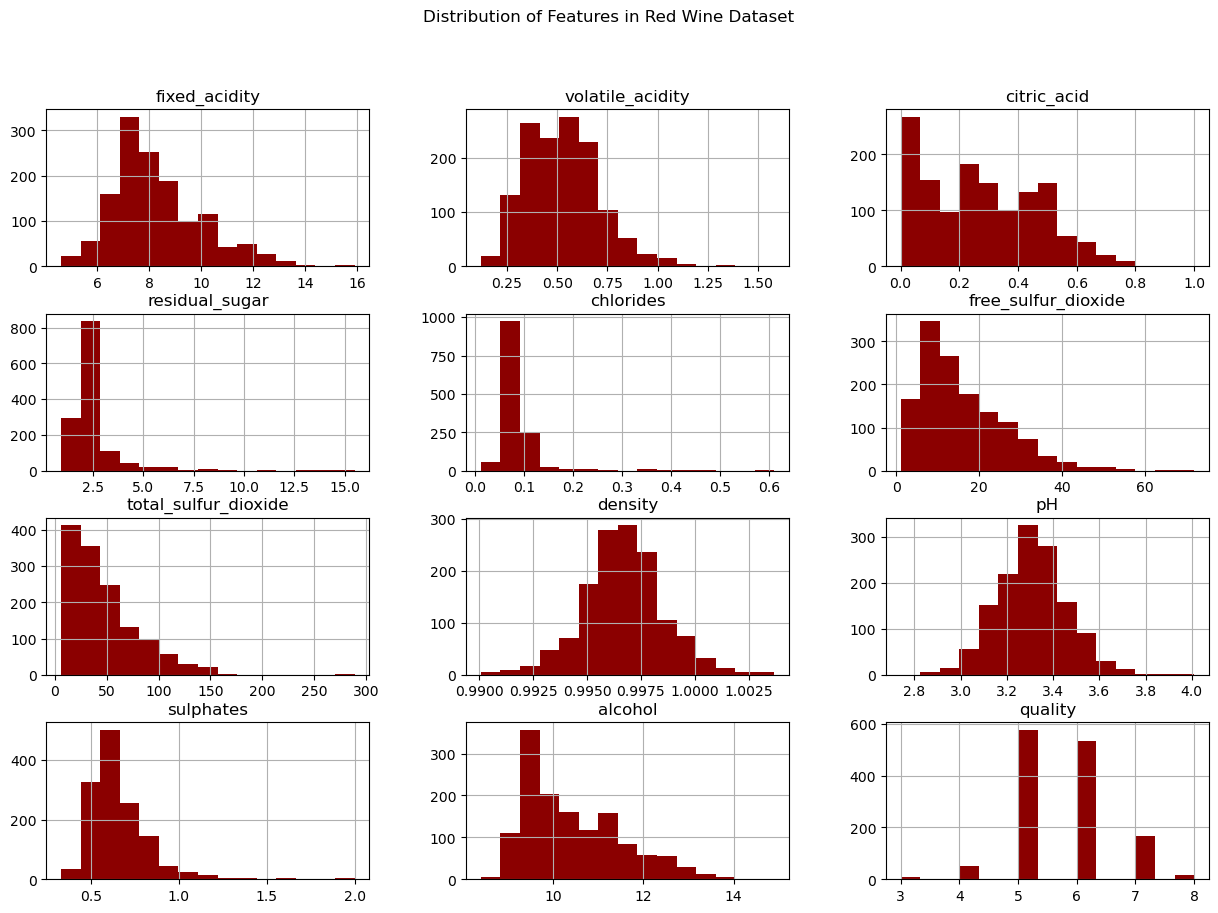

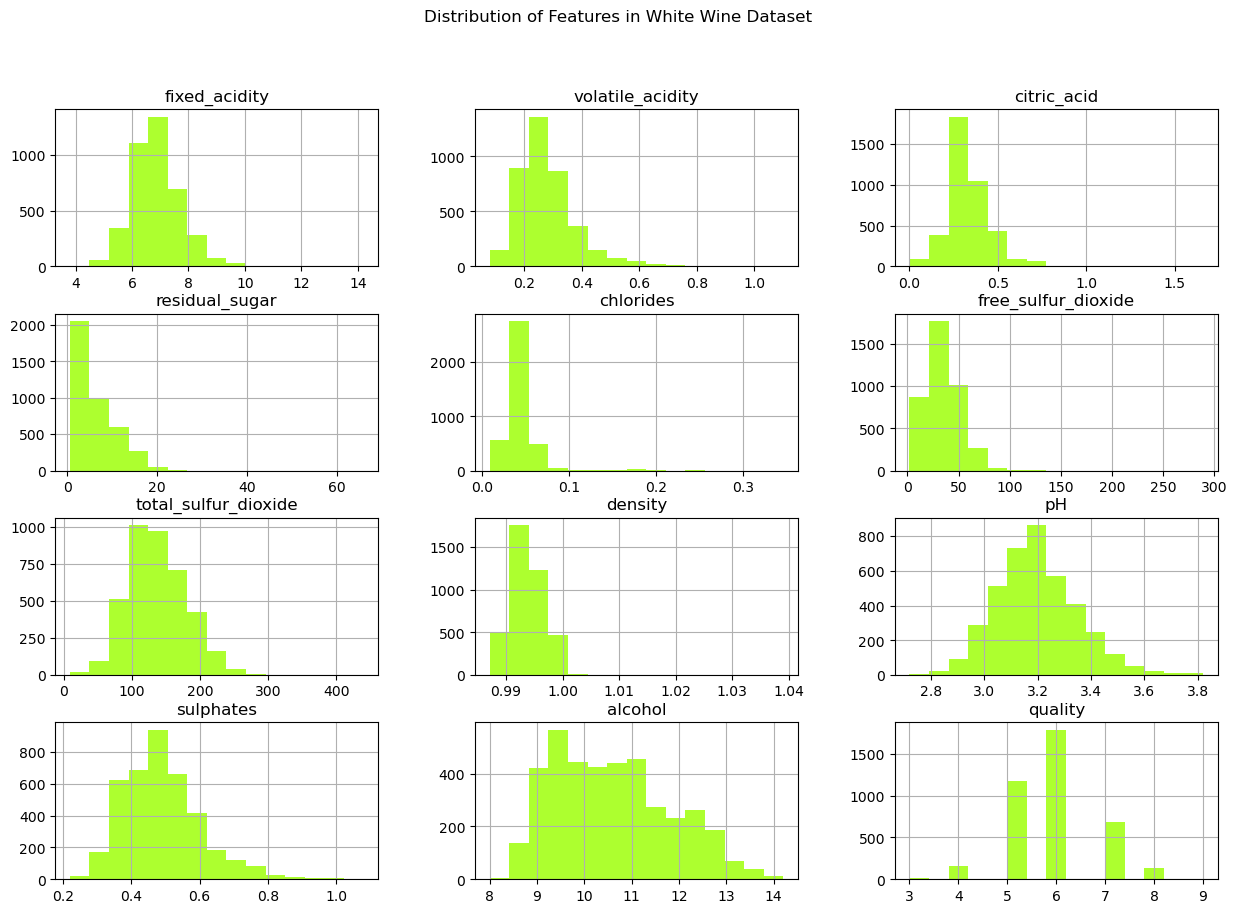

In [9]:
# Initial Visual Exploration:
# Plot histograms for each feature to see the distribution of the variables.
# Box plots can help identify outliers and the spread of the data.

# Histograms for red wine features
red_wine.hist(bins=15, figsize=(15, 10), color = 'darkred')
plt.suptitle('Distribution of Features in Red Wine Dataset')
plt.show()

# Histograms for white wine features
white_wine.hist(bins=15, figsize=(15, 10), color = 'greenyellow')
plt.suptitle('Distribution of Features in White Wine Dataset')
plt.show()


# 4 Variable Analysis and Threshold-Based Outlier Handling

This section focuses on exploring key variables that may present outliers, either statistically or in relation to legal and enological thresholds.  
Where applicable, cleaning decisions were made based on official limits (e.g., EU/OIV standards) and typical winemaking practices.  

For variables not directly filtered in this notebook, a more detailed regulatory analysis was conducted in the R version.



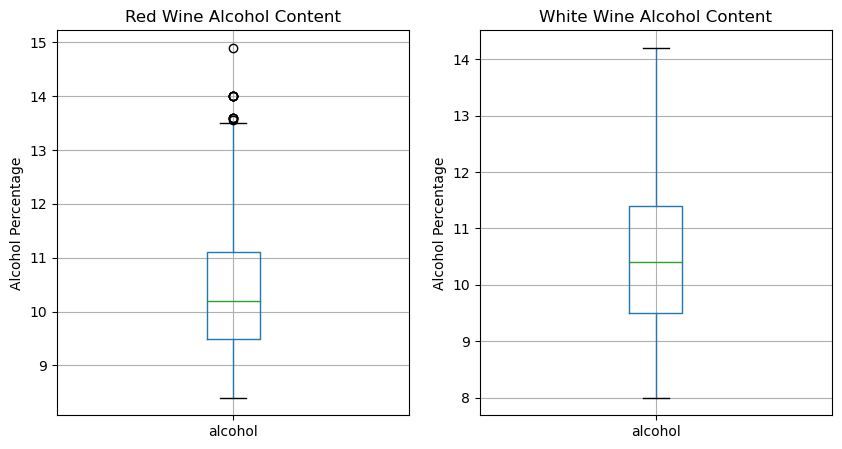

In [10]:
# Example box plot for alcohol content in both datasets
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
red_wine.boxplot(column='alcohol', ax=ax[0])
ax[0].set_title('Red Wine Alcohol Content')
ax[0].set_ylabel('Alcohol Percentage')

white_wine.boxplot(column='alcohol', ax=ax[1])
ax[1].set_title('White Wine Alcohol Content')
ax[1].set_ylabel('Alcohol Percentage')
plt.show()

Box plots, with their way of statiscally representing the distribution of data through five primary dimensions plus the outliers, greatly differs from the summary tables.
Each feature (like residual sugar, alcohol, etc.) is represented as a box plot. The box represents the interquartile range (IQR) where 50% of the data lies. The line in the middle of the box is the median. The "whiskers" extend to 1.5 times the IQR from the box, and points outside these are considered outliers.


## 4.1 Identifying Outliers

Outliers can affect the results of data analysis, especially if they result from data entry errors or measurement errors.
1. Outliers could be data __entry errors__ (e.g., free sulfur dioxide that’s impossibly high). If they're errors, they will be corrected or removed.
2. In wine data, some outliers might be genuine (e.g., dessert wines with high sugar levels). __Understanding the context__ is crucial before deciding to remove or adjust these values.
3. Statistical Methods for Handling Outliers:
   Capping: For some analyses, I might cap values at a certain percentile (e.g., 99th percentile).
   Transformation: Applying transformations (like logarithmic) can reduce the effect of extreme outliers in skewed distributions.

Each feature (like residual sugar, alcohol, etc.) is represented as a box plot. The box represents the interquartile range (IQR) where 50% of the data lies. The line in the middle of the box is the median. The "whiskers" extend to 1.5 times the IQR from the box, and points outside these are considered outliers.

###  4.1.1 Why Use CVRVV Standards for Cleaning?

The [Vinhos Verdes Region Viticulture Commission](https://portal.vinhoverde.pt/pt/produtos-regras-de-conformidade/GVVT) (CVRVV) is recognized for its strategic management and legal protection of the "Vinho Verde" Denomination of Origin and the "Minho" Geographical Indication. The CVRVV is accredited by the Portuguese Institute of Accreditation (IPAC), ensuring that their standards for wine characteristics are both authoritative and aligned with international quality benchmarks. These standards, especially the authorized values for wine components, are critical for ensuring data integrity in our analysis. By adopting CVRVV’s guidelines, we ensure our dataset adheres to established and recognized wine quality standards, enhancing the credibility and reliability of our findings.

### 4.1.2 Fuction: Legal Limits

In [11]:
# Generic function for max and min legal values for red wine
def apply_legal_thresholds(red_wine, thresholds):

    filtered_red_wine = red_wine.copy()
    for column, limits in thresholds.items():
        if 'min' in limits:
            filtered_red_wine = filtered_red_wine[filtered_red_wine[column] >= limits['min']]
        if 'max' in limits:
            filtered_red_wine = filtered_red_wine[filtered_red_wine[column] <= limits['max']]
    return filtered_red_wine

# Diccionary with legal limits
legal_limits = {
    "fixed_acidity": {"min": 4.5},
    "volatile_acidity": {"max": 1.2},
    "citric_acid": {"max": 1.0},
    "chlorides": {"max": 2.0},
    "free_sulfur_dioxide": {"max": 160.0},
    "total_sulfur_dioxide": {"max": 150.0},
    "sulphates": {"max": 2.0},
    "alcohol": {"min": 7.0, "max": 14.5}
}

# Give back the function before using it
apply_legal_thresholds, legal_limits


(<function __main__.apply_legal_thresholds(red_wine, thresholds)>,
 {'fixed_acidity': {'min': 4.5},
  'volatile_acidity': {'max': 1.2},
  'citric_acid': {'max': 1.0},
  'chlorides': {'max': 2.0},
  'free_sulfur_dioxide': {'max': 160.0},
  'total_sulfur_dioxide': {'max': 150.0},
  'sulphates': {'max': 2.0},
  'alcohol': {'min': 7.0, 'max': 14.5}})

In [12]:
# Apply limits to the red_wine dataset
red_wine_clean = apply_legal_thresholds(red_wine, legal_limits)


In [13]:
# Function to apply max and min legal limits for white wine
def apply_legal_thresholds(white_wine, thresholds):

    filtered_white_wine = white_wine.copy()
    for column, limits in thresholds.items():
        if 'min' in limits:
            filtered_white_wine = filtered_white_wine[filtered_white_wine[column] >= limits['min']]
        if 'max' in limits:
            filtered_white_wine = filtered_white_wine[filtered_white_wine[column] <= limits['max']]
    return filtered_white_wine

# Create a diccionary for white wine legal limits
legal_limits = {
    "fixed_acidity": {"min": 4.5},
    "volatile_acidity": {"max": 1.2},
    "citric_acid": {"max": 1.0},
    "chlorides": {"max": 2.0},
    "free_sulfur_dioxide": {"max": 160.0},
    "total_sulfur_dioxide": {"max": 400.0},
    "sulphates": {"max": 2.0},
    "alcohol": {"min": 7.0, "max": 14.5}
}

# Give back the function and the dictionary before using it
apply_legal_thresholds, legal_limits


(<function __main__.apply_legal_thresholds(white_wine, thresholds)>,
 {'fixed_acidity': {'min': 4.5},
  'volatile_acidity': {'max': 1.2},
  'citric_acid': {'max': 1.0},
  'chlorides': {'max': 2.0},
  'free_sulfur_dioxide': {'max': 160.0},
  'total_sulfur_dioxide': {'max': 400.0},
  'sulphates': {'max': 2.0},
  'alcohol': {'min': 7.0, 'max': 14.5}})

In [14]:
# Apply the function to the white wine dataset
white_wine_clean = apply_legal_thresholds(white_wine, legal_limits)

In [15]:
# Create a function to identify outliers fpr the red wine dataset
def count_outliers_by_iqr(df):
    summary = []
    for column in df.select_dtypes(include='number').columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        summary.append({
            'Variable': column,
            'Outlier Count': outliers.shape[0],
            'Lower Bound': round(lower_bound, 3),
            'Upper Bound': round(upper_bound, 3)
        })
    return red_wine_clean.DataFrame(summary)

red_wine_clean.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [16]:
# Identify outliers in the white wine dataset
def count_outliers_by_iqr(df):
    summary = []
    for column in df.select_dtypes(include='number').columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        summary.append({
            'Variable': column,
            'Outlier Count': outliers.shape[0],
            'Lower Bound': round(lower_bound, 3),
            'Upper Bound': round(upper_bound, 3)
        })
    return white_wine_clean.DataFrame(summary)

white_wine_clean.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


# 5 Red Wine Dataset

## 5.1 Outlier Analysis: Fixed Acidity

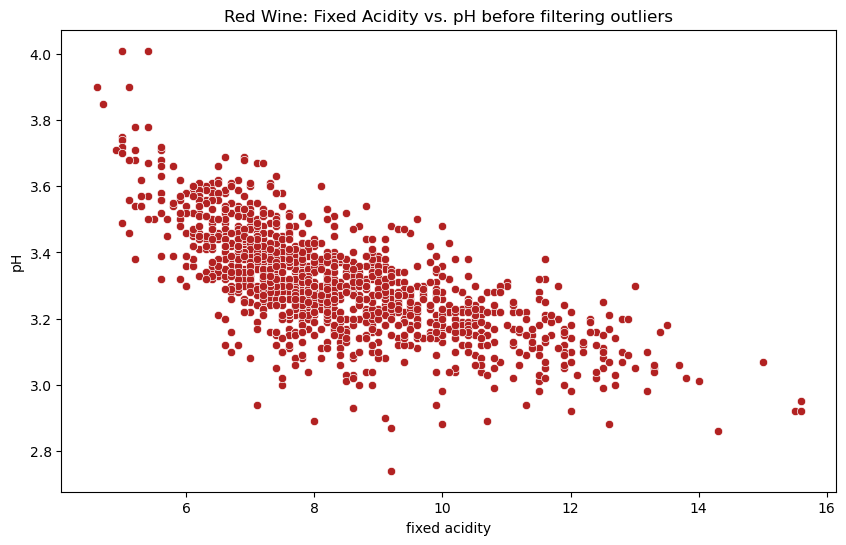

In [17]:
# Example: Plot fixed acidity vs pH for red wine
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fixed_acidity', y='pH', data=red_wine_clean, color = 'firebrick')
plt.title('Red Wine: Fixed Acidity vs. pH before filtering outliers')
plt.xlabel('fixed acidity')
plt.ylabel('pH')
plt.show()

In [18]:
# Pearson correlation coefficient for fixed acidity and pH
red_wine['fixed_acidity'].corr(red_wine['pH'], method='pearson')

-0.6866851055982749

**Analysis of the Scatter Plot: Fixed Acidity vs. pH**

Horizontal Axis (Fixed Acidity): Represents the fixed acidity levels of the wines.
Vertical Axis (pH): Represents the pH levels of the wines.

* Observations:
Negative Correlation: The plot displays a downward trend, indicating that as fixed acidity increases, the pH of the wine generally decreases. This relationship is expected because higher acidity in wine typically corresponds to a lower pH value, which is more acidic.
The index for the correlation indicates a a moderate-to-strong negative correlation between acidity and pH, just as explected after the box-plot.

* Spread and Density of Points: 
The points are densely packed at lower levels of fixed acidity but begin to spread out as acidity increases. This spread suggests variability in how pH responds to changes in acidity, particularly at higher acidity levels.

* Cluster Patterns: 
Most of the data points cluster between fixed acidity levels of about 6 to 10 and pH levels from 3.0 to 3.6. This clustering shows the common range for these variables in red wine.

* Implications:
Chemistry Behind Wine: The negative correlation between acidity and pH in wine is a fundamental aspect of wine chemistry. Acids are a major determinant of the pH level in wine; thus, this plot provides a clear visual representation of this relationship.

* Wine Making Considerations: 
Understanding this correlation is crucial for winemakers as it impacts the tartness and overall flavor profile of the wine. Managing acidity is essential for achieving desired taste and stability.

* Further Analysis:
Statistical Measures: To complement this visual analysis, I will calculate the correlation coefficient to quantify the strength and direction of this relationship.

* Other Influencing Factors: 
Other factors might influence pH.: Malolactic fermentation can decrease wine acidity and increase pH and may be worth investigating.

##  5.2 Outlier Analysis: Volatile Acidity


Volatile Acidity (red wine):
count    1346.000000
mean        0.526984
std         0.176490
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.185000
Name: volatile_acidity, dtype: float64


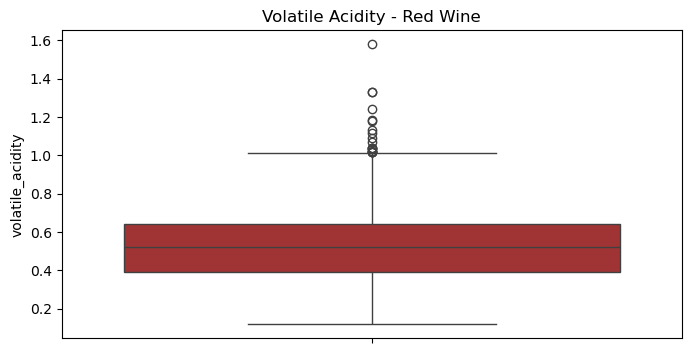

In [19]:
# Summary statistics and boxplot
print("Volatile Acidity (red wine):")
print(red_wine_clean['volatile_acidity'].describe())

plt.figure(figsize=(8,4))
sns.boxplot(y=red_wine['volatile_acidity'], color= 'firebrick')
plt.title("Volatile Acidity - Red Wine")
plt.show()


Volatile acidity values above 1.20 g/dm³ were removed, as this represents a legal threshold based on EU/OIV guidelines.  
Values below this threshold, even if relatively high from a statistical point of view, were retained when deemed plausible within winemaking practices.


## 5.3 Outlier Analysis: Total Sulfur Dioxide

**Sulfur dioxide (SO₂)** is widely used in winemaking due to its antioxidant and antibacterial properties. Higher concentrations may be present in wines requiring extended preservation, such as those for long aging or those made from grapes more susceptible to microbial spoilage.

**Wine Type Influence:** Sweet wines typically exhibit higher sulfur dioxide levels to inhibit fermentation and prevent spoilage, owing to their higher residual sugar content.

**Regulatory Limits:**  
According to the International Code of Oenological Practices (OIV, 2015/01), the maximum total SO₂ levels are:
- **150 mg/L** for red wines  
- **200 mg/L** for white wines  
- **400 mg/L** for sweet wines  

Additionally, any wine with more than 10 mg/L of total SO₂ must be labeled with *"contains sulphites."* These thresholds vary slightly across regions but fall within the range observed in our dataset.

**Cleaning Decision:**  
Samples with total SO₂ above **150 mg/L** were removed, as they exceed the legal maximum for red wines according to the OIV guidelines.  
Unlike sweet or white wines, red wines are expected to stay below this threshold. No additional tolerance is applied in this case, and all values exceeding 150 mg/L were considered non-compliant and excluded from the dataset.



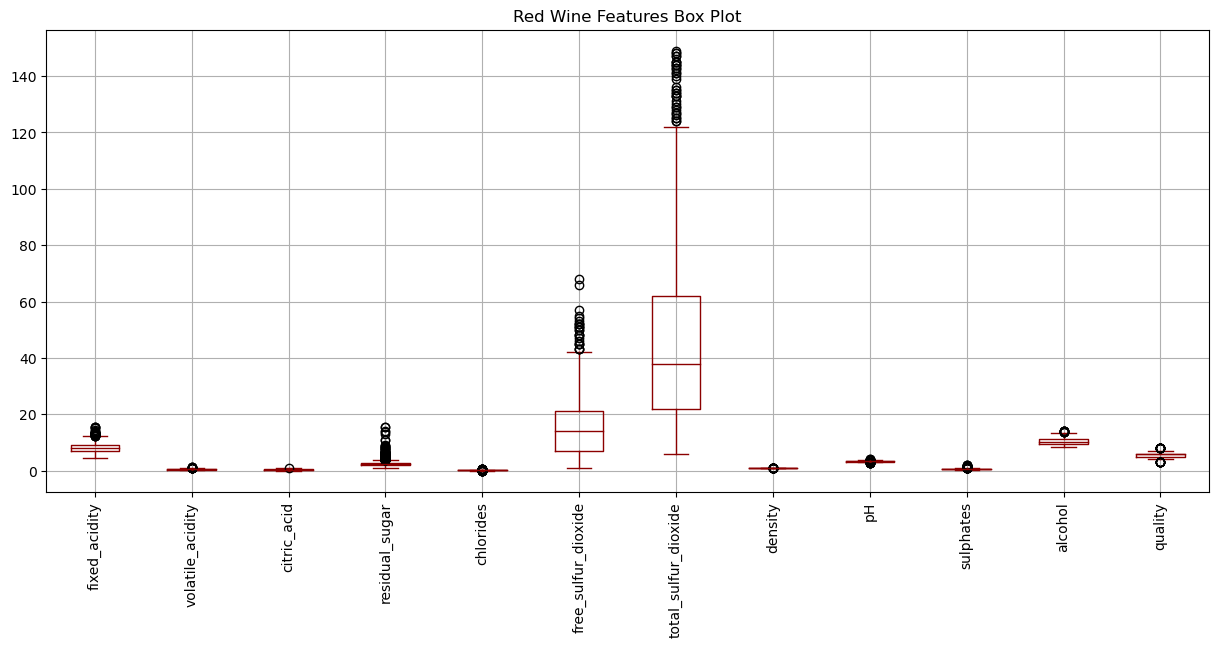

In [20]:
# Outlier Detection:
# The box plot scans the data and identifies outliers.

import matplotlib.pyplot as plt

# Plotting box plots for red wine features to inspect for outliers
red_wine_clean.boxplot(rot=90, figsize=(15, 6), color='darkred')  # 'rot' rotates the labels for better readability
plt.title('Red Wine Features Box Plot')
plt.show()

## 5.4 Outlier Analysis: Residual Sugar

Among red wines—typically described as deep, dark, acidic, and astringent—residual sugar in Vinho Verde can vary between **1.5 and 12 g/L**, depending on the producer and wine style.

As a general reference, wines may contain between **4 and 50 g/L** of residual sugar depending on the aging process or type. Certain sweet wines can reach **250 g/L**, and extreme examples such as *Tokaji Eszencia* can exceed **450 g/L**. Residual sugar levels remain stable throughout bottle aging.

---

**Contextual Interpretation:**

Based on the dataset and enological context, the red wine samples showing **higher levels of residual sugar and density** are still plausible for this category. Red Vinho Verde is known for its stylistic variability and rich flavor profile, which may include fuller-bodied or semi-sweet expressions.

Given that Vinho Verde is often produced for local consumption, it is reasonable to assume that some observations reflect unique production choices or vintages—such as particularly warm years that led to higher sugar concentration in the grapes.

---

**Cleaning Decision:**  
Since these values remain within plausible stylistic boundaries and do not violate legal thresholds or expected quality standards, they were retained in the dataset.


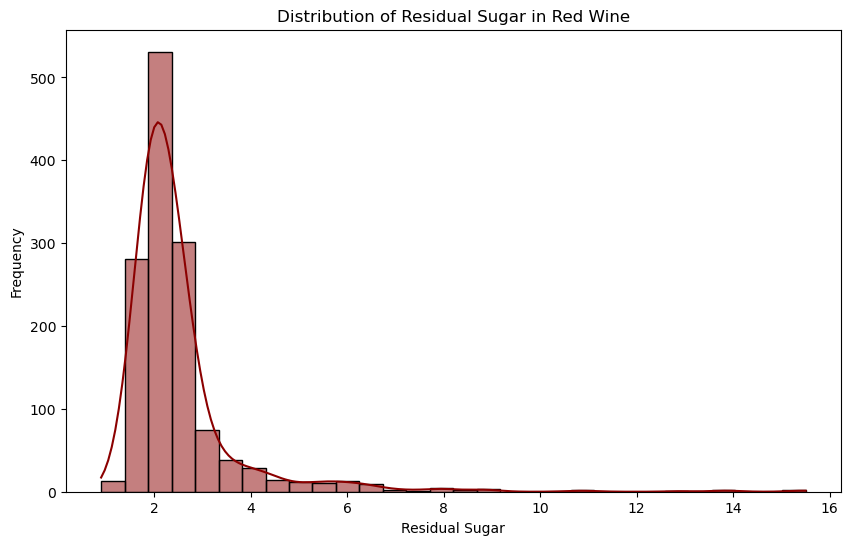

In [21]:
# Residual Sugar: Shows a significant number of outliers above the upper whisker, indicating some wines have much higher sugar content than typical.

# Histogram and density plot for residual sugar
plt.figure(figsize=(10, 6))
sns.histplot(red_wine_clean['residual_sugar'], bins=30, kde=True, color = ('darkred'))
plt.title('Distribution of Residual Sugar in Red Wine')
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.show()

In [22]:
# Identify outliers for residual sugar
outlier_condition = (red_wine_clean['residual_sugar'] > 12.0)
outliers = red_wine_clean[outlier_condition]
print(outliers)


      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
480            10.6              0.28         0.39            15.5      0.069   
1235            6.0              0.33         0.32            12.9      0.054   
1434           10.2              0.54         0.37            15.4      0.214   
1474            9.9              0.50         0.50            13.8      0.205   
1574            5.6              0.31         0.78            13.9      0.074   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
480                   6.0                  23.0  1.00260  3.12       0.66   
1235                  6.0                 113.0  0.99572  3.30       0.56   
1434                 55.0                  95.0  1.00369  3.18       0.77   
1474                 48.0                  82.0  1.00242  3.16       0.75   
1574                 23.0                  92.0  0.99677  3.39       0.48   

      alcohol  quality  
480       9.2        5  


## 5.5 Outlier Analysis: Density

According to Michlovský, the density of both red and white wines generally falls within the range of **0.9912 to 1.0138 g/cm³**.

Initially, no filtering was applied to this variable, as most values appeared physically reasonable. However, upon closer inspection, a few extreme values were identified — including densities **below 0.990 and above 1.003** — which are unlikely under standard winemaking conditions.

As a result, records with density values **outside the range of 0.990 to 1.003** were removed to improve the dataset’s integrity and ensure consistency with accepted physical parameters for wine.


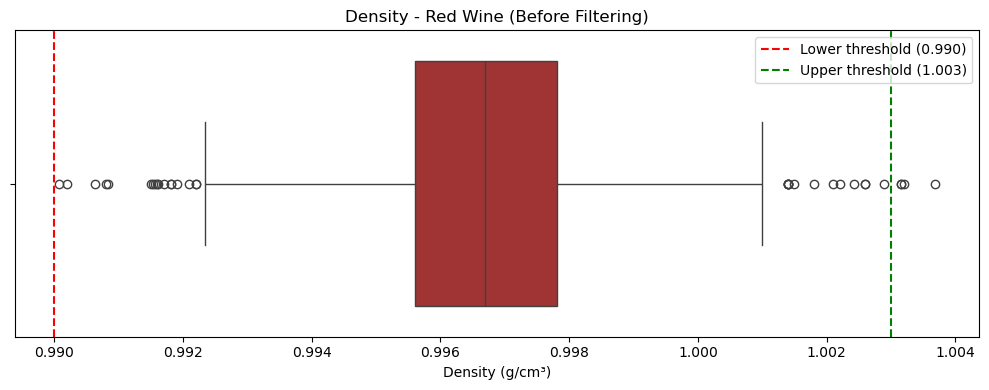

In [23]:
# Boxplot with limits for red wine before filtering
plt.figure(figsize=(10, 4))
sns.boxplot(x=red_wine_clean['density'], color = 'firebrick')
plt.axvline(0.990, color='red', linestyle='--', label='Lower threshold (0.990)')
plt.axvline(1.003, color='green', linestyle='--', label='Upper threshold (1.003)')
plt.title("Density - Red Wine (Before Filtering)")
plt.xlabel("Density (g/cm³)")
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
# Identify outliers
density_outlier = (red_wine_clean['density'] < 0.990) | (red_wine_clean['density'] > 1.003)
outliers = red_wine_clean[density_outlier]

print("Outliers to remove:")
print(red_wine_clean[density_outlier])

Outliers to remove:
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
442            15.6             0.685         0.76             3.7      0.100   
554            15.5             0.645         0.49             4.2      0.095   
557            15.6             0.645         0.49             4.2      0.095   
1434           10.2             0.540         0.37            15.4      0.214   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
442                   6.0                  43.0  1.00320  2.95       0.68   
554                  10.0                  23.0  1.00315  2.92       0.74   
557                  10.0                  23.0  1.00315  2.92       0.74   
1434                 55.0                  95.0  1.00369  3.18       0.77   

      alcohol  quality  
442      11.2        7  
554      11.1        5  
557      11.1        5  
1434      9.0        6  


In [25]:
# Remove density outliers
red_wine_clean = red_wine_clean[~density_outlier]

# Print for confirmation
print(f"Remaining entries after removing density outliers: {red_wine_clean.shape[0]}")


Remaining entries after removing density outliers: 1342


## 5.6 Outlier Analysis: pH

pH measures the acidity of wine and plays a key role in ripeness and microbial stability. Most wines have a pH between **3.0 and 4.0**. Typically:
- White wines: 3.0 to 3.4  
- Red wines: 3.5 to 3.8  
*Higher acidity corresponds to lower pH.*

### 5.6.1 Refinement: pH Outliers Reconsidered

Initially, pH values below 3.0 and above 4.0 were excluded from the red wine dataset based on common enological assumptions. This was grounded in the idea that values outside this range could reflect data entry errors or rare instability.

However, further research revealed that this range was too restrictive. Although pH above 4.0 may lead to chemical instability and values below 2.9 are unusual, such cases are not necessarily implausible. The **physiological range for wine pH** is generally considered to span from **2.9 to 4.0**, with exceptions depending on style, production techniques, and timing of measurement.

As a result, no exclusions based solely on pH were applied in the final version of the analysis.


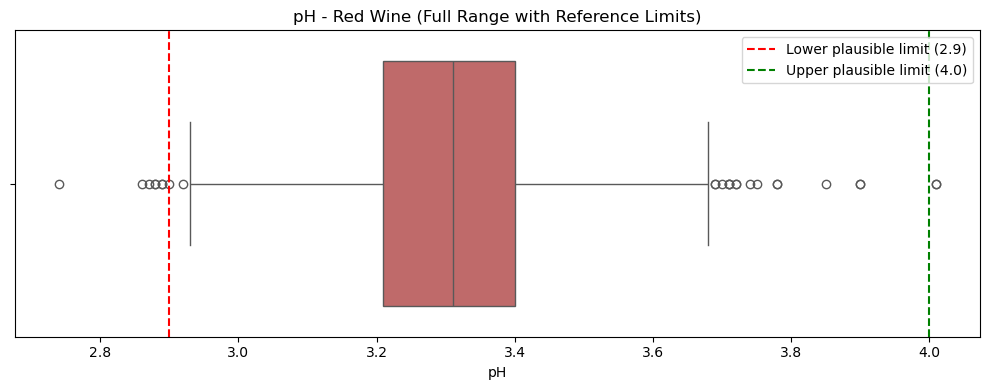

In [26]:
# Box plot with guide lines with plausable values (2.9–4.0)
plt.figure(figsize=(10, 4))
sns.boxplot(x= red_wine_clean['pH'], color= 'indianred')
plt.axvline(2.9, color='red', linestyle='--', label='Lower plausible limit (2.9)')
plt.axvline(4.0, color='green', linestyle='--', label='Upper plausible limit (4.0)')
plt.title("pH - Red Wine (Full Range with Reference Limits)")
plt.xlabel("pH")
plt.legend()
plt.tight_layout()
plt.show()

## 5.7 Outlier Analysis: Alcohol Content vs. Quality

To assess the relationship between alcohol content and quality in red wine, a scatter plot was used to visualize the distribution of samples by alcohol percentage and sensory rating.

### 5.7.1 Scatter Plot Interpretation

- **Horizontal Axis (Alcohol %):** Represents the alcohol content of each wine.
- **Vertical Axis (Quality):** Represents the quality rating, treated as a numeric variable for this exploratory analysis.

### 5.7.2 Observations

- **Clustering at Higher Ratings:** Wines with higher alcohol content tend to cluster around quality ratings of 6 and above.
- **Low-Quality, Low-Alcohol Samples:** Few wines with high alcohol (>12%) are rated below 5.
- **Nonlinear Spread:** While the trend suggests that higher alcohol may be associated with higher quality, the relationship is not strictly linear.

This implies a **positive but not perfect correlation**: alcohol likely contributes to perceived quality, but is only one among several influencing factors.

---

### 5.7.3 Statistical Insight

The visual trend aligns with a **moderate positive correlation coefficient**, suggesting that alcohol content has some predictive value for quality, though not deterministically so.

Other variables such as acidity, residual sugar, or sulphates may interact with alcohol to affect overall wine quality. A full understanding would require multivariate analysis.

---

### 5.7.4 Implications for Modeling

The scatter plot provides an informative starting point for deeper analysis.  
In future stages, techniques like **linear or logistic regression** could quantify the individual and combined impact of alcohol and other variables on quality ratings.


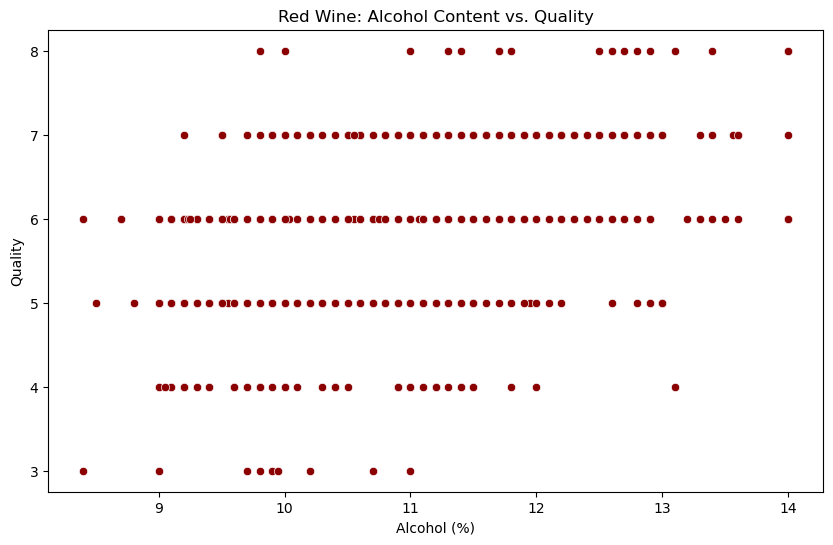

In [27]:
# Plot alcohol vs quality for red wine
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='quality', data=red_wine_clean, color = 'darkred')
plt.title('Red Wine: Alcohol Content vs. Quality')
plt.xlabel('Alcohol (%)')
plt.ylabel('Quality')
plt.show()


In [28]:
# Quantify the relationship between alchol and quality with Pearson correlation
correlation = red_wine_clean['alcohol'].corr(red_wine_clean['quality'])
print(f"Correlation between alcohol and quality: {correlation:.2f}")


Correlation between alcohol and quality: 0.49


This visual trend is supported by the correlation coefficient (r = 0.49), indicating a moderate positive relationship between alcohol content and quality.


## 5.8 Correlation Matrix After Cleaning – Red Wine

The correlation matrix below summarizes the relationships between the cleaned variables in the red wine dataset.  
It confirms previously observed associations (e.g., between alcohol and quality) and serves as a reference for potential multivariate analysis.

The cleaned dataset is now ready for export and further modeling.


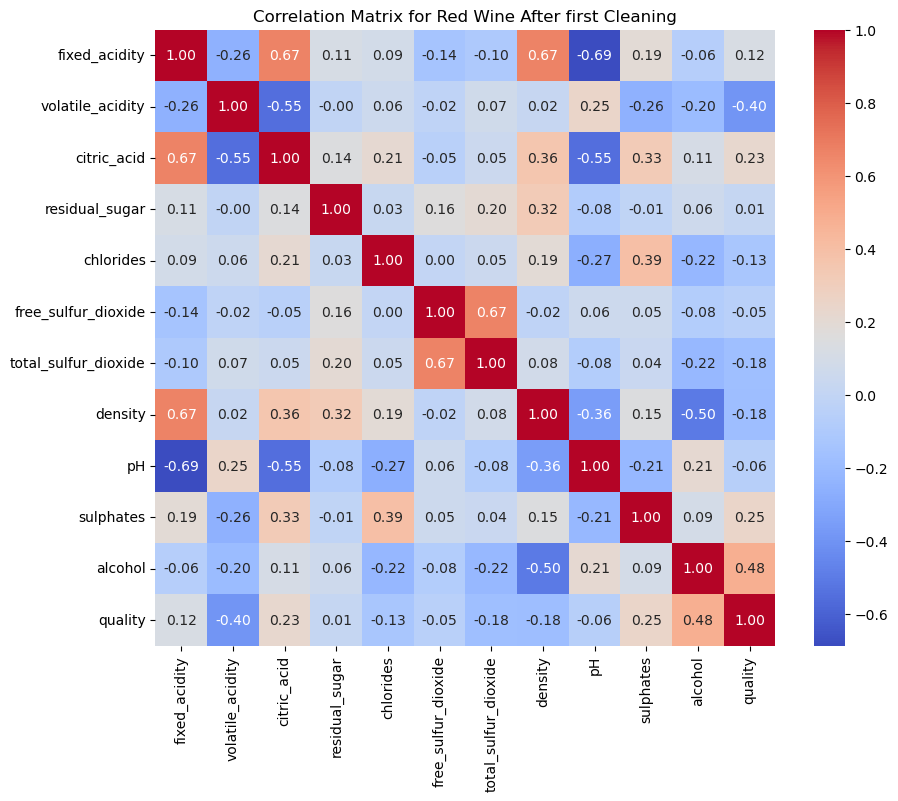

In [29]:
# Calculate correlations after cleaning the red wine dataset
corr_red = red_wine.corr()

# Heatmap for Red Wine
plt.figure(figsize=(10, 8))
sns.heatmap(corr_red, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Red Wine After first Cleaning')
plt.show()

In [30]:
# Save the cleaned red wine dataset
# red_wine.to_csv("red_wine_clean.csv", index=False)
# print("Cleaned red wine dataset saved.")

print("Updated dataset size:", red_wine.shape[0])
print(red_wine.describe())

Updated dataset size: 1359
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000   

#  6 White Wine Dataset

##  6.1 Dataset Overview and Initial Exploration

In [31]:
# General information about the white wine dataset
white_wine_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3951 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3951 non-null   float64
 1   volatile_acidity      3951 non-null   float64
 2   citric_acid           3951 non-null   float64
 3   residual_sugar        3951 non-null   float64
 4   chlorides             3951 non-null   float64
 5   free_sulfur_dioxide   3951 non-null   float64
 6   total_sulfur_dioxide  3951 non-null   float64
 7   density               3951 non-null   float64
 8   pH                    3951 non-null   float64
 9   sulphates             3951 non-null   float64
 10  alcohol               3951 non-null   float64
 11  quality               3951 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 401.3 KB


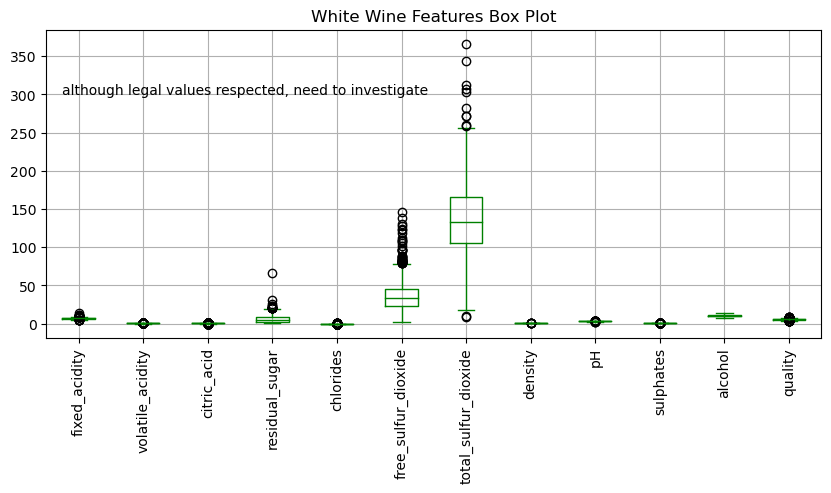

In [32]:
# Plot box plots for white wine features
white_wine_clean.boxplot(rot=90, figsize=(10,4), color ='green')
plt.title('White Wine Features Box Plot')
plt.annotate('although legal values respected, need to investigate', xy =(0.75, 300))

plt.show()


The **white wine dataset** contains **12 features and 3,992 observations, with no missing values**.

All variables are numerical, including the output variable “quality”, which is derived from sensory evaluations.

Variables are the same than in the red wine dataset.

## 6.2 Outlier Analysis: Fixed Acidity

**Legal values:** Min: 4.5, Max: Not regulated

**Maximum value:** The maximum fixed acidity observed in the dataset is 14.2, is significantly higher than the mean (6.83) plus three standard deviations (0.875 * 3 = 2.625, threshold = 9.455). This extreme value may indicate a data entry error or an exceptionally rare wine sample. To ensure the integrity of the analysis, due to the absence of metadata about region, grape variety, or vintage—which might explain higher acidity values—it is not possible to determine if these observations are stylistic or erroneous. Therefore, apart from removing outliers that exceed regulatory thresholds (volatile acidity > 1.20), these observations have been retained in the dataset. 



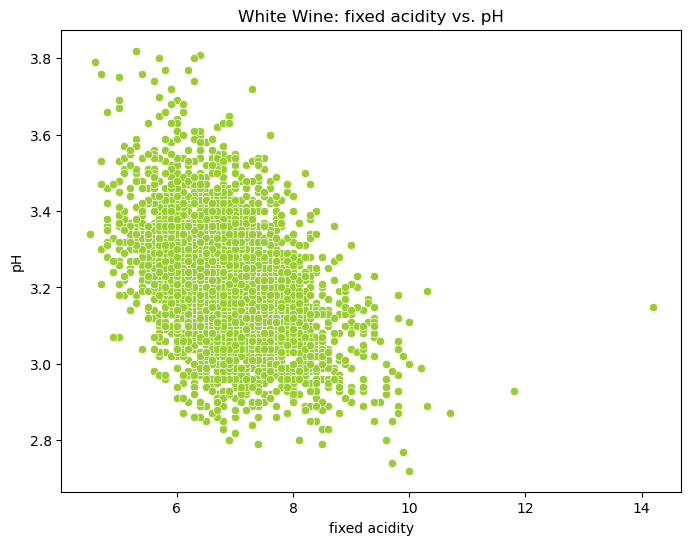

In [33]:
# Plot fixed acidity vs pH for white wine
plt.figure(figsize=(8,6))
sns.scatterplot(x='fixed_acidity', y='pH', data= white_wine_clean, color='yellowgreen')
plt.title('White Wine: fixed acidity vs. pH')
plt.xlabel('fixed acidity')
plt.ylabel('pH')
plt.show()

## 6.3 Outlier Analysis: Volatile Acidity

**Legal values:** Min: Not regulated, Max: 1.20

**Maximum value:** The maximum volatile acidity in the dataset is 1.1, which is quite high compared to the mean (0.277) plus three standard deviations (0.101 * 3 = 0.303, threshold = 0.58). Given that volatile acidity significantly influences the aroma and taste of wine—where high values may indicate spoilage or winemaking faults—readings well above 0.58 could be considered outliers unless typical for a specific wine style.

**Considerations for Outlier Handling**

- **Acidity and Wine Quality:** Both fixed and volatile acidity are key determinants of a wine’s flavor profile, stability, and overall quality. Elevated levels can indicate spoilage or fermentation issues, unless justified by stylistic choices (e.g., certain Italian red wines may have naturally higher acidity).

- **Contextual Understanding:** Due to the absence of metadata about region, grape variety, or vintage—which might explain higher acidity values—it is not possible to determine if these observations are stylistic or erroneous. Therefore, apart from removing outliers that exceed regulatory thresholds (volatile acidity > 1.20), these observations have been retained in the dataset.


Volatile Acidity (white wine):
count    3951.000000
mean        0.280501
std         0.103410
min         0.080000
25%         0.210000
50%         0.260000
75%         0.330000
max         1.100000
Name: volatile_acidity, dtype: float64


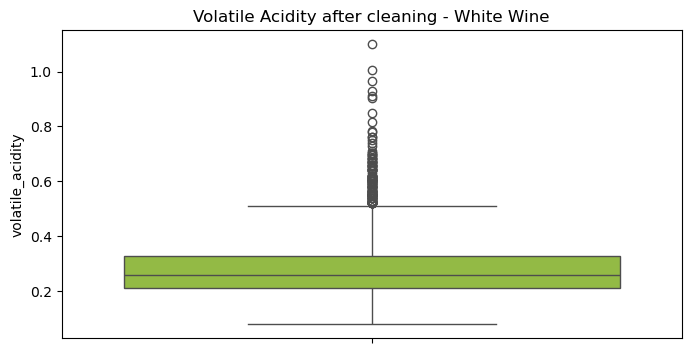

Remaining white wine samples after removing volatile acidity > 1.20: 3951


In [34]:
# Summary statistics and boxplot
print("Volatile Acidity (white wine):")
print(white_wine_clean['volatile_acidity'].describe())

plt.figure(figsize=(8,4))
sns.boxplot(y=white_wine_clean['volatile_acidity'], color = 'yellowgreen')
plt.title("Volatile Acidity after cleaning - White Wine")
plt.show()

print(f"Remaining white wine samples after removing volatile acidity > 1.20: {white_wine_clean.shape[0]}")



After removing outliers based on a statistical threshold, the remaining values for volatile acidity in white wine fall well within the legally accepted range (max: 1.2 g/dm³).  
This reinforces the plausibility of the data and supports its retention for further analysis.


## 6.4 Outlier Analysis: Total Sulfur Dioxide

Although some samples exceeded 200 mg/L of total sulfur dioxide, all values remained within the legal threshold for white wines (max 200 mg/L, or 400 mg/L for sweet wines).  
Given their plausibility and alignment with enological standards, no records were removed based on this variable.


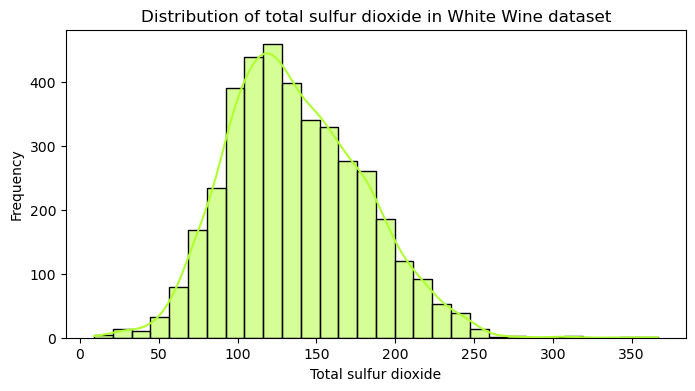

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram and density plot for free sulfur dioxide. Parameters already checked.
plt.figure(figsize=(8,4))
sns.histplot(white_wine_clean['total_sulfur_dioxide'], bins=30, kde=True, color='greenyellow')
plt.title('Distribution of total sulfur dioxide in White Wine dataset')
plt.xlabel('Total sulfur dioxide')
plt.ylabel('Frequency')
plt.show()

In [36]:
# Quantify the number of possible sweet white wines
high_so2 = white_wine_clean[white_wine_clean['total_sulfur_dioxide'] > 200]
print(f"Number of white wines with SO₂ > 200: {high_so2.shape[0]}")

Number of white wines with SO₂ > 200: 315


In [37]:
high_so2.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,6.964127,0.316937,0.360698,9.854921,0.051876,53.334921,222.066667,0.996706,3.178635,0.521238,9.562540,5.441270
std,0.752331,0.108790,0.129488,4.419189,0.026926,18.806204,20.498143,0.002018,0.137629,0.088750,0.654621,0.708599
min,5.800000,0.155000,0.090000,0.800000,0.024000,8.000000,201.000000,0.991540,2.870000,0.300000,8.500000,3.000000
25%,6.400000,0.250000,0.270000,7.200000,0.043000,42.000000,209.000000,0.995500,3.090000,0.460000,9.100000,5.000000
50%,6.800000,0.290000,0.340000,9.200000,0.047000,53.000000,217.000000,0.996600,3.170000,0.520000,9.500000,5.000000
75%,7.400000,0.350000,0.440000,12.800000,0.054000,62.000000,230.000000,0.997885,3.250000,0.580000,9.900000,6.000000
max,9.800000,0.905000,1.000000,23.500000,0.301000,146.500000,366.500000,1.002410,3.740000,0.820000,13.100000,8.000000


What the describe() table tells us about these 315 wines:

| Metric               | Value       | Interpretation                                                  |
|----------------------|-------------|------------------------------------------------------------------|
| Mean residual_sugar  | 9.85 g/L    | Moderately high but well below 45 g/L (sweet threshold)         |
| Max residual_sugar   | 23.50 g/L    | Still not sweet; possibly semi-dry                              |
| Mean total_SO₂       | 222.07 mg/L  | Slightly above limit for whites, but legal for sweet wines      |
| Max total_SO₂        | 366.5 mg/L  | Close to 400 mg/L but still legal                               |
| Mean alcohol         | 9.56%       | Low alcohol justifies higher SO₂ for stability                  |
| Mean pH              | 3.18        | Slightly acidic; high SO₂ is typical with this profile          |


## 6.5 Outlier Analysis: Citric Acid

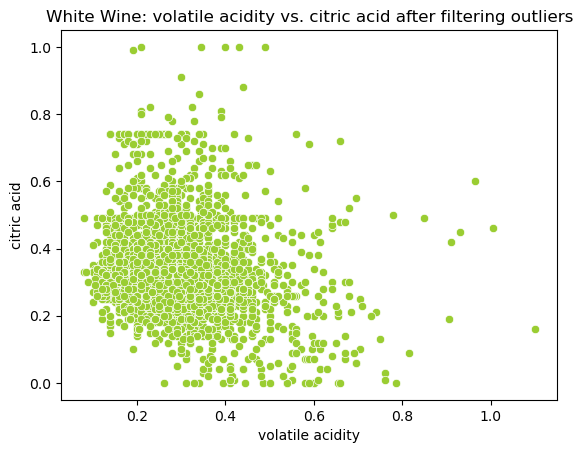

In [38]:
# Plot volatile acidity vs citric acid(figsize=(10, 6))
sns.scatterplot(x='volatile_acidity', y='citric_acid', data= white_wine_clean, color = 'yellowgreen')
plt.title('White Wine: volatile acidity vs. citric acid after filtering outliers')
plt.xlabel('volatile acidity')
plt.ylabel('citric acid')
plt.show()

Outliers for citric acid were removed based on legal thresholds.  
The scatter plot below illustrates the relationship between citric acid and volatile acidity in white wine.  
Some points show unusually high citric acid relative to volatile acidity, but all values fall within legally acceptable ranges.  
While citric acid levels are regulated, volatile acidity is often more stylistic and can vary significantly depending on production choices.


## 6.6 Outlier Analysis: Residual Sugar

This section includes:
- A boxplot showing the distribution of residual sugar among high SO₂ white wines  
- A histogram of residual sugar in the white Vinho Verde dataset  
- A scatterplot illustrating the relationship between residual sugar and density

---

### 6.6.1 Possible Sweet Wines (n = 315)

Although 315 white wine samples exceed the standard 200 mg/L limit for total sulfur dioxide in white wines, none surpass the 400 mg/L threshold legally permitted for sweet wines.  
Their moderate residual sugar levels and relatively low alcohol content suggest the need for increased SO₂ for microbiological stability—consistent with acceptable enological practices for semi-dry styles. These observations were therefore retained in the dataset.

---

### 6.6.2 Extreme Sugar Values: Review and Adjustment

One record reported a residual sugar value of **65.8 g/L** with an alcohol content of **11.7%**, which appeared implausible at first.  
This sugar level significantly exceeds both the standard deviation and the typical range for most wines, including dessert wines, which usually range from **45 g/L up to 200 g/L** in rare cases.

The alcohol-to-sugar ratio also appeared inconsistent:  
- **Low-alcohol sweet wines** (e.g., some German Rieslings) typically have <10% ABV  
- **Fortified wines** with similar sugar levels often exceed 15% ABV  
A value of 11.7% with 65.8 g/L does not align well with either profile, suggesting a possible data entry error.

Initially, extreme values were removed based on statistical thresholds and presumed implausibility.  
However, after multivariate review—including alcohol content, density, and volatility—some high-sugar samples were found to be chemically consistent with legitimate sweet wine characteristics (e.g., alcohol <10%, density >1.038). These were reinstated due to their internal coherence and enological plausibility.

---

### 6.6.3 Final Consideration

There are no legal thresholds for residual sugar in this context.  
Given the chemical and stylistic plausibility of the retained values, no further exclusions were made for this variable.


In [39]:
# Investigate further possible relationships to identify sweet white wines
potential_sweet_wines = white_wine_clean[
    (white_wine_clean['total_sulfur_dioxide'] > 200) |
    (white_wine_clean['residual_sugar'] > 45)
]

print(f"Possible sweet wines: {potential_sweet_wines.shape[0]}")


Possible sweet wines: 316


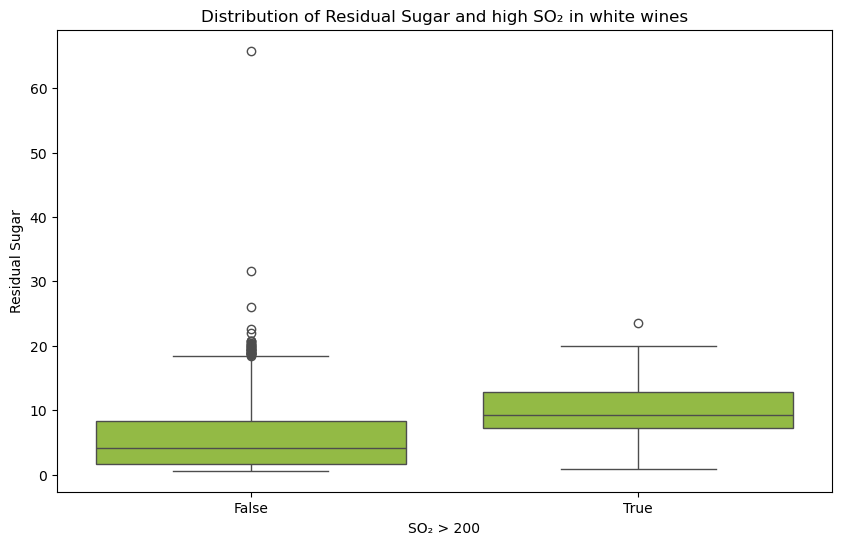

In [40]:
# Boxplot for the distribution of Residual sugar with high total sulfur dioxide values
white_wine_clean['SO2_high'] = white_wine_clean['total_sulfur_dioxide'] > 200

plt.figure(figsize=(10, 6))
sns.boxplot(data=white_wine_clean, x='SO2_high', y='residual_sugar', color='yellowgreen')
plt.xlabel('SO₂ > 200')
plt.ylabel('Residual Sugar')
plt.title('Distribution of Residual Sugar and high SO₂ in white wines')
plt.show()



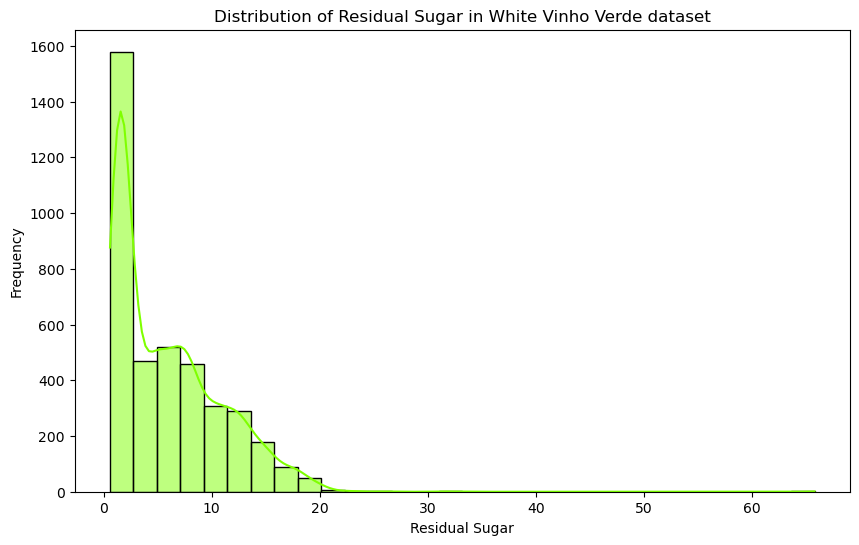

In [41]:
# Histogram and density plot for residual sugar
plt.figure(figsize=(10, 6))
sns.histplot(white_wine_clean['residual_sugar'], bins=30
            , kde=True, color ='chartreuse')
plt.title('Distribution of Residual Sugar in White Vinho Verde dataset')
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.show()

The high levels of residual sugar maybe compatible with dessert wines, for the moment I am keeping the values of the outliners until further invastigation.

In [42]:
# Identify potential outliers in the white wine dataset
# Typically, outliers might be defined as those beyond 3 standard deviations from the mean
outlier_condition = (white_wine_clean['residual_sugar'] > 22.01) & (white_wine_clean['alcohol'] > 9)
outliers = white_wine_clean[outlier_condition]
print(outliers)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
2781            7.8             0.965         0.60           65.80      0.074   
3619            6.8             0.450         0.28           26.05      0.031   
4480            5.9             0.220         0.45           22.60      0.120   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
2781                  8.0                 160.0  1.03898  3.39       0.69   
3619                 27.0                 122.0  1.00295  3.06       0.42   
4480                 55.0                 122.0  0.99636  3.10       0.35   

      alcohol  quality  SO2_high  
2781     11.7        6     False  
3619     10.6        6     False  
4480     12.8        5     False  


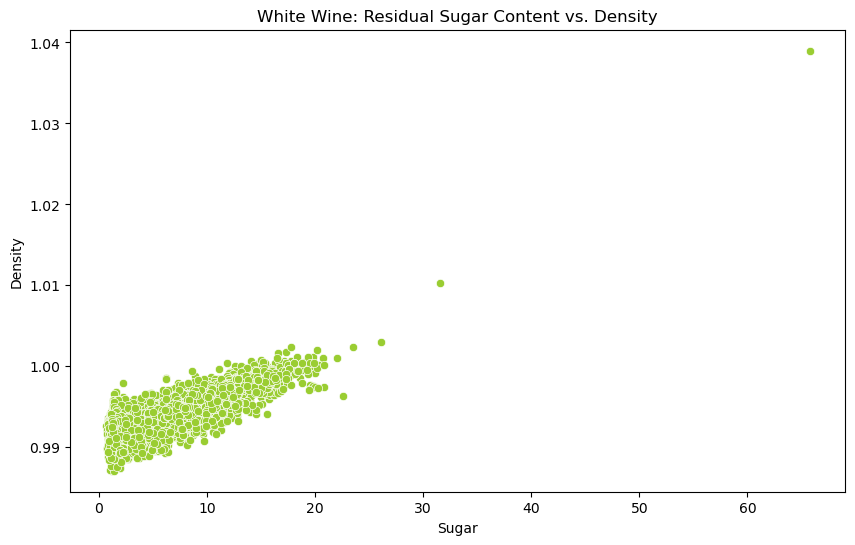

In [43]:
# Scatterplot for sugar vs density in white wine
plt.figure(figsize=(10, 6))
sns.scatterplot(x='residual_sugar', y='density', data=white_wine_clean, color='yellowgreen')
plt.title('White Wine: Residual Sugar Content vs. Density')
plt.xlabel('Sugar')
plt.ylabel('Density')
plt.show()

## 6.7 Outlier Analysis: Density

The same density thresholds applied to the red wine dataset (0.990–1.003 g/cm³) were used here, based on values widely accepted within the enological community.  
These limits are supported by technical literature, including work by Michlovský, and reflect the typical physical range observed in both red and white wines.

The scatterplot below illustrates the relationship between alcohol content and density in white wines.  
As expected, a general inverse relationship is observed: wines with higher alcohol tend to have lower density, due to sugar conversion during fermentation.  
Samples with low alcohol and unusually high density may indicate sweet wine profiles or fermentation anomalies and were investigated accordingly.



In [44]:
# Apply same limits than in the red wine dataset
density_outlier = (white_wine_clean['density'] < 0.990) | (white_wine_clean['density'] > 1.003)
outliers = white_wine_clean[density_outlier]

# Remove the outlier
white_wine_clean = white_wine_clean[~density_outlier]


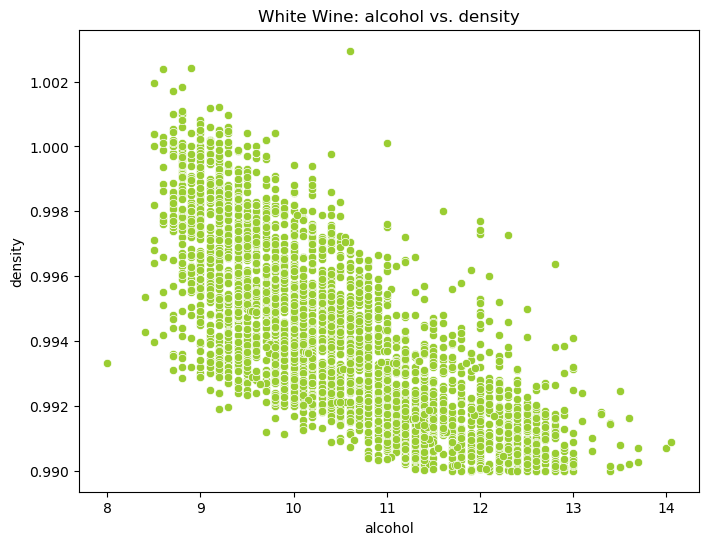

In [45]:
# Example: scatterplot of alcohol vs density for white wine
plt.figure(figsize=(8,6))
sns.scatterplot(x='alcohol', y='density', data= white_wine_clean, color='yellowgreen')
plt.title('White Wine: alcohol vs. density')
plt.xlabel('alcohol')
plt.ylabel('density')
plt.show()

In [46]:
# Define a condition of low alcoholic graduatione and high density
suspected_sweet = (white_wine_clean['alcohol'] < 10) & (white_wine_clean['density'] > 1.038)

# Find the possible observations
sweet_wine_candidates = white_wine_clean[suspected_sweet]

# Print the result
print(f"Number of suspected sweet wines: {sweet_wine_candidates.shape[0]}")
sweet_wine_candidates.head()


Number of suspected sweet wines: 0


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,SO2_high


No white wine samples met the combined criteria of **alcohol < 10%** and **density > 1.038**,  
suggesting that no sweet or semi-sweet wines were chemically identifiable using this filter.  
This further supports the homogeneity of the dataset and the reliability of the cleaning process.


## 6.8 Correlation Matrix After Cleaning – White Wine

* Color Scheme: The coolwarm color scheme is effective for distinguishing positive (warm colors) from negative (cool colors) correlations.

* Strong Correlation: Values close to +1.0 or -1.0 indicate a strong relationship between the two variables. The closer the value is to +1.0, the stronger the positive correlation, and the closer it is to -1.0, the stronger the negative correlation. Weak Correlation: Values close to 0 indicate a weak or no linear relationship between the variables.

* Direction of the Correlation:

    Positive Correlation (+ value): As one variable increases, the other also increases. For example, in wine data, a positive correlation between alcohol and quality means that generally wines with higher alcohol content might be perceived as higher quality.

    Negative Correlation (- value): As one variable increases, the other decreases. In our data, for example, the negative correlation between pH and citric acid in white wine means that as the citric acid content increases, the pH value tends to decrease (the wine becomes more acidic). A correlation of 0.5 or -0.5 and beyond can often be considered moderately strong, and merits closer examination.

* Considering the Context:

The strong positive correlation between density and residual sugar in white wine (0.79) makes sense because sugars increase the density of the liquid.

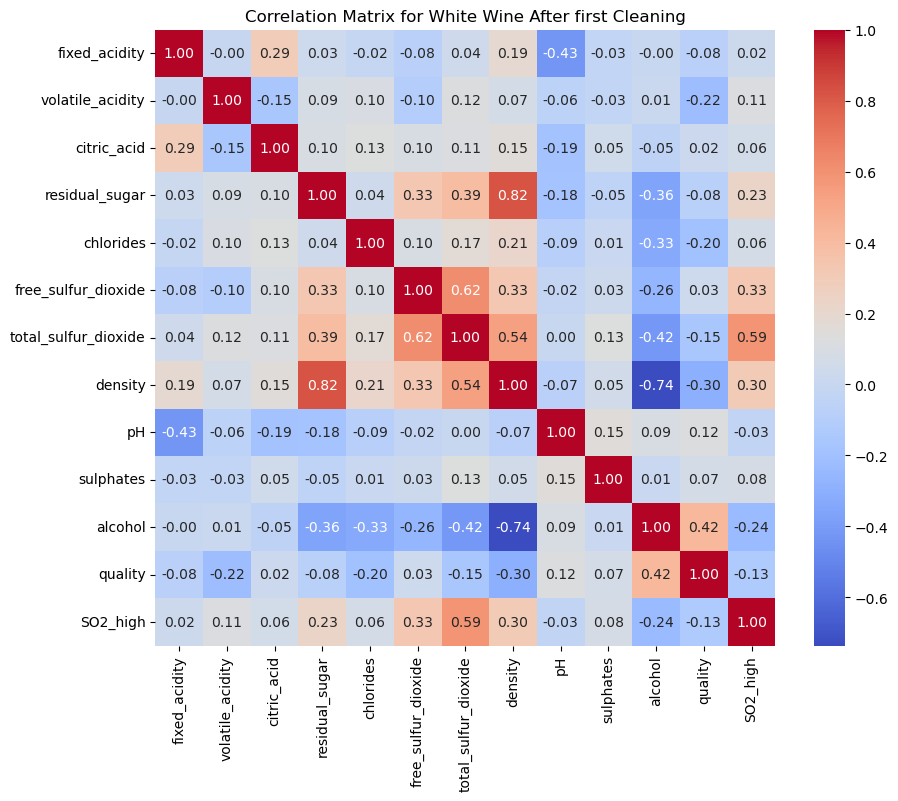

In [47]:
# Calculate correlation coefficient excluding the 'wine_type' column
corr_white = white_wine_clean.corr()

# Generate the heatmap for White Wine
plt.figure(figsize=(10, 8))
sns.heatmap(corr_white, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for White Wine After first Cleaning')
plt.show()

##   6.9 Final Considerations on White Wine Outliers

The outlier analysis for the white wine dataset combined statistical methods (e.g., IQR, standard deviation thresholds) with enological knowledge and legal standards.  
Where appropriate, values exceeding legal thresholds were removed, while those deemed chemically and stylistically plausible were retained—even when statistically extreme.

Specific attention was given to variables such as total sulfur dioxide, residual sugar, and density, where outliers might indicate valid production styles rather than data errors.  
Multivariate relationships were explored using scatter plots (e.g., alcohol vs. density) to identify potential sweet wine profiles, but no such cases were found under the tested conditions.

This process ensures the dataset's integrity for further analysis, modeling, or quality classification while respecting the variability inherent in winemaking practices.


In [48]:
# Save the cleaned white wine dataset
# white_wine_clean.to_csv("white_wine_clean.csv", index=False)
# print("Cleaned white wine dataset saved successfully.")

# Print summary statistics and final dataset size
print(f"Updated dataset size: {white_wine_clean.shape[0]} rows")
print("\nSummary statistics after cleaning:")
print(white_wine_clean.describe())


Updated dataset size: 3651 rows

Summary statistics after cleaning:
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    3651.000000       3651.000000  3651.000000     3651.000000   
mean        6.898316          0.279240     0.336505        6.207560   
std         0.851667          0.102943     0.122067        4.803494   
min         4.500000          0.080000     0.000000        0.600000   
25%         6.400000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.400000          0.320000     0.390000        9.400000   
max        14.200000          1.100000     1.000000       26.050000   

        chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  3651.00000          3651.000000           3651.000000  3651.000000   
mean      0.04694            35.195015            139.860449     0.994145   
std       0.02353            16.924317             42.690279 

## 7 Final Summary – Data Cleaning in Python

### 7.1 Objectives
This project focuses on the cleaning and exploration of red and white wine datasets, with particular emphasis on identifying and handling outliers using Python.  
Legal thresholds and sensory relevance were considered to ensure data integrity, avoiding the removal of stylistically justified values.

---

### 7.2 Key Actions Taken

- **Exploratory Analysis**: Assessed distributions and value ranges using `describe()`, boxplots, and histograms. No missing values were found.
- **Legal Threshold Validation**: Compared variable values against EU or widely accepted enological limits (e.g., SO₂, volatile acidity).
- **Outlier Filtering**:
  - Removed values exceeding legal constraints (e.g., SO₂ > 400, volatile acidity > 1.20).
  - Retained stylistically plausible values, even when statistically extreme (e.g., residual sugar).
- **Contextual Evaluation**: Cross-checked combinations of variables against realistic wine profiles (e.g., higher SO₂ in lower-alcohol wines).
- **Multivariate Exploration**: Used scatterplots and correlation checks to identify patterns and potential compound anomalies.

---

### 7.3 Reasoning Behind Key Decisions

- **Regulatory Compliance First**: Outliers above legal limits were removed systematically.
- **Context Over Statistics**: Values compatible with known winemaking variations (e.g., terroir, vintage, style) were retained.
- **Avoiding Overcleaning**: Care was taken not to remove observations that contribute to the dataset’s typicity and variability.

---

### 7.4 Next Step

- Consider automation with IQR or Z-score methods for future datasets.

---

### 7.5 Concluding Remarks

This project demonstrates the capability of Python to support transparent and context-aware data cleaning in the wine domain.  
By integrating legal knowledge with visual and statistical tools, the final dataset balances regulatory compliance with interpretability — a key skill in real-world data projects.

---

### 7.6 References and Regulatory Sources

- [VINHOS VERDES – Official Portal](https://portal.vinhoverde.pt/pt/produtos-regras-de-conformidade/GVVT)
- [OIV – International Code of Oenological Practices](https://www.oiv.int/en/technical-standards-and-documents)
- [EU Regulation 606/2009 on Oenological Practices](https://eur-lex.europa.eu/legal-content/IT/TXT/?uri=CELEX:32009R0606)
- [Definition of Sweet Wines – EU Regulation](https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX%3A32019R0033)
- [NCBI – Wine Chemistry Reference](https://pmc.ncbi.nlm.nih.gov/articles/PMC10489813/#:~:text=According%20to%20Michlovsk%C3%BD%20%5B2%5D%2C,to%201.0138%20g/cm3.)
- [More Wine! – Must Testing](https://morewinemaking.com/articles/testing_wine_must#:~:text=The%20typical%20pH%20range%20for%20red%20wines%20is%20between%203.5%20and%203.8.)
- [IVES – International Viticulture and Enology Society](https://ives-openscience.eu/14307/)
- [The World of Fine Wine – Vinho Verde](https://worldoffinewine.com/news-features/vinho-verde-new-wave)
- [AEB – pH Determination in Wine](https://www.aeb-group.com/it/determinazione-del-ph-del-vino)
- [Wine acidification methods: a review](https://oeno-one.eu/article/view/7476)


For a complementary perspective—particularly on variable-specific reasoning and regulatory interpretation—see the R version of this project.  
Together, these two notebooks demonstrate a complete, cross-platform approach to enologically informed data cleaning.


---

Author & Attribution

Created by **Virginia Levy Abulafia**  
✉️ [virginiayonit@gmail.com](mailto:virginiayonit@gmail.com)  

This notebook is part of a two-part project on data cleaning in R and Python.  
Feel free to explore, fork, or reach out!